# IMPORTING LIBRARIES

In [118]:
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy import stats

# LOADING DATASET

In [119]:
train_data = pd.read_csv('/Users/dell/Desktop/Titanic/titanic_train.csv')
train_data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [120]:
train_data.tail()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.700,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.775,NaN,S,NaN,NaN,NaN,0
849,425,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.000,NaN,S,NaN,19.0,"Bronx, NY",0


In [121]:
test_data = pd.read_csv('/Users/dell/Desktop/Titanic/titanic_test.csv')
test_data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN


In [122]:
test_data.tail()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
454,1194,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S,NaN,NaN,NaN
455,403,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S,NaN,NaN,"England / Detroit, MI"
456,108,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,4,NaN,NaN
457,510,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,NaN,NaN,"Halesworth, England"
458,1265,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,NaN,NaN,NaN


# DATA EXPLORATION

In [123]:
# Display all the column names
train_data.columns.tolist()

['passenger_id',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest',
 'survived']

In [124]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


# Information about the columns '''

1)PassengeId: It is a unique id given to every passenger.

2)Survived: It indicates whether the passenger survived or not. The value 1 indicates he/she survived, 0 idicates they were not able to survive.

3)Pclass: It contains information about which class the passenger was traveling by.

4)Name: Ihis field contains name of the passenger.

5)Sex: Contains Gender information of the passenger.

6)Age: Contains a numerical value which is the age of the passenger.

7)SibSp: Contains information regarding the number of siblings/spouse the passenger had on the ship.

8)Parch: Contains information regarding the number of Parents/children's the passenger had on the ship.

9)Ticket: Has the passenges Ticket number.

10)Cabin: Indicates which Cabin was assigned to the passenger.

11)Embarked: Indicates where the passenger boarded the ship. '''

In [125]:
# Counting rows and coulums
col_row = train_data.shape
print('Columns in dataset:', col_row[1],'\nRows in dataset:', col_row[0])

Columns in dataset: 15 
Rows in dataset: 850


In [126]:
#Total cells in the dataset
total_cells=np.product(train_data.shape)
print('Total cells in this dataset:',total_cells)

Total cells in this dataset: 12750


# DATA WRANGLING

# Cleaning Data

# Identifying duplicate values

In [127]:
train_data.duplicated().sum()

0

In [128]:
train_data.loc[train_data.duplicated(keep=False)]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived


# Identifing missing values

In [129]:
# Finding the amount of missing values in each column
missing_values = train_data.isnull().sum().sort_values(ascending = False)
missing_values

body            777
cabin           659
boat            542
home.dest       386
age             174
embarked          1
fare              1
survived          0
ticket            0
parch             0
sibsp             0
sex               0
name              0
pclass            0
passenger_id      0
dtype: int64

In [130]:
# Calculating the percentage of missing values:
total_missing = missing_values.sum()

In [131]:
# Calculating percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("Total missing values: {}  =  {:.2f} %".format(total_missing, percent_missing))

Total missing values: 2540  =  19.92 %


In [132]:
print('PERCENTAGE OF MISSING VALUES IN EACH COLUMN:\n')
for col in train_data.columns:
    missing = np.mean(train_data[col].isnull())
    print('{}:  {:.2f}%'.format(col, missing*100))

PERCENTAGE OF MISSING VALUES IN EACH COLUMN:

passenger_id:  0.00%
pclass:  0.00%
name:  0.00%
sex:  0.00%
age:  20.47%
sibsp:  0.00%
parch:  0.00%
ticket:  0.00%
fare:  0.12%
cabin:  77.53%
embarked:  0.12%
boat:  63.76%
body:  91.41%
home.dest:  45.41%
survived:  0.00%


# VISUALIZATION OF MISSING DATA

<AxesSubplot:>

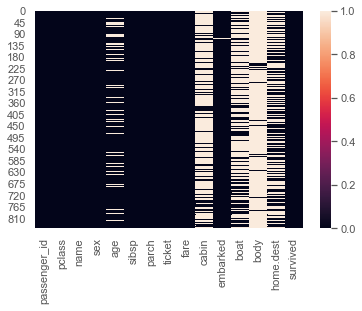

In [133]:
sns.heatmap(train_data.isnull())

# Viewing the missing values in the dataset

In [134]:
train_data[pd.isnull(train_data.embarked)]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,1


In [135]:
train_data['embarked'].value_counts()

S    589
C    176
Q     84
Name: embarked, dtype: int64

In [136]:
train_data["embarked"] = train_data["embarked"].fillna("S")

In [137]:
train_data[pd.isnull(train_data.embarked)]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived


In [138]:
# Checking and counting the values in the 'Embarked' column
train_data['embarked'].value_counts()

S    590
C    176
Q     84
Name: embarked, dtype: int64

In [139]:
# Deleting the column
train_data.drop("cabin", axis=1, inplace=True)

In [140]:
train_data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,NaN,NaN,"Barre, Co Washington, VT",0


# Filling the missing values

In [141]:
train_data.age.describe().to_frame()


,age
count,676.000000
mean,29.519847
std,14.562243
min,0.166700
25%,20.000000
50%,28.000000
75%,37.000000
max,80.000000


# Histogram

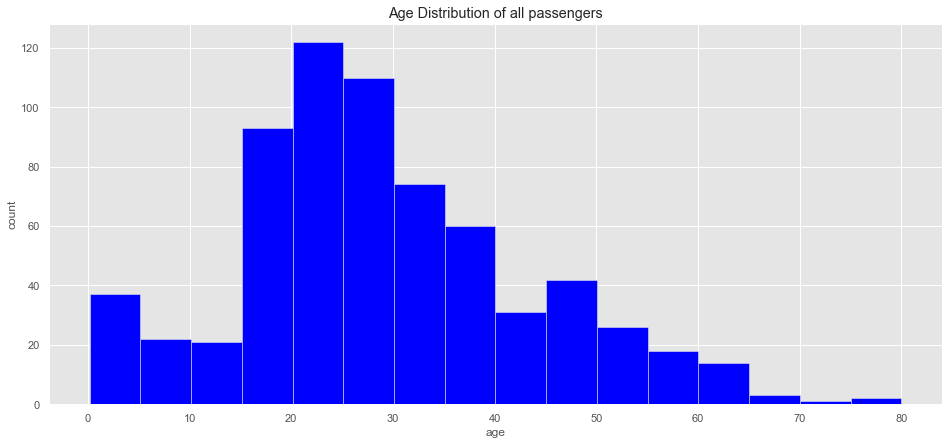

In [142]:
train_data['age'].hist(bins=16, color='blue' ,figsize=(16,7))
plt.title('Age Distribution of all passengers')
plt.xlabel('age')
plt.ylabel('count')
plt.grid(True)

In [143]:
# Grouping Column 'Sex' to see the average age or women and men
grouped_sex_age = train_data.groupby(['sex']).age.agg([len, min, max, 'mean'])
grouped_sex_age

,len,min,max,mean
sex,,,,
female,299.0,0.1667,76.0,28.858401
male,551.0,0.4167,80.0,29.898256


In [144]:
# Grouping the 'Pclass' to see if the average age changes from class to class
grouped_class_age = train_data.groupby(['pclass']).age.agg([len, min, max, 'mean'])
grouped_class_age

,len,min,max,mean
pclass,,,,
1,206.0,0.9167,80.0,39.110960
2,166.0,0.6667,70.0,28.601496
3,478.0,0.1667,74.0,24.693949


In [145]:
# Checking the age and amount of people for each class and sex
grouped_sex_pclass_age = train_data.groupby(['sex', 'pclass']).age.agg([len, min, max, 'mean', 'median'])
grouped_sex_pclass_age

len     min   max       mean  median
sex    pclass                                        
female 1        94.0  2.0000  76.0  38.134831    36.0
       2        67.0  2.0000  60.0  26.976562    27.5
       3       138.0  0.1667  48.0  21.275986    22.0
male   1       112.0  0.9167  80.0  40.025439    41.0
       2        99.0  0.6667  70.0  29.731884    29.0
       3       340.0  0.4167  74.0  26.002058    25.0

In [146]:
# Checking the age and amount of people for each class and sex and SibSp
grouped_sex_pclass_age = train_data.groupby(['pclass', 'sibsp']).age.agg([len, min, max, 'mean', 'median'])
grouped_sex_pclass_age

len      min   max       mean  median
pclass sibsp                                         
1      0      127.0   4.0000  80.0  38.827103    36.0
       1       72.0   0.9167  76.0  39.927381    39.5
       2        6.0  13.0000  59.0  36.500000    37.0
       3        1.0  28.0000  28.0  28.000000    28.0
2      0      104.0   0.8333  70.0  31.046099    30.0
       1       55.0   0.6667  63.0  25.554545    27.0
       2        7.0   4.0000  24.0  19.714286    22.0
3      0      342.0   0.4167  74.0  26.932403    25.0
       1       86.0   0.1667  50.0  23.513682    25.0
       2       12.0  16.0000  41.0  22.625000    19.5
       3       11.0   2.0000  33.0  11.375000     5.0
       4       14.0   1.0000  16.0   7.142857     7.0
       5        5.0   9.0000  16.0  12.000000    11.0
       8        8.0  14.5000  14.5  14.500000    14.5

In [147]:
fem_p1 =train_data.loc[(train_data.sex == 'female') & (train_data.pclass == 1)].age.median()
fem_p2 =train_data.loc[(train_data.sex == 'female') & (train_data.pclass == 2)].age.median()
fem_p3 =train_data.loc[(train_data.sex == 'female') & (train_data.pclass == 3)].age.median()
male_p1 =train_data.loc[(train_data.sex == 'male') & (train_data.pclass == 1)].age.median()
male_p2 =train_data.loc[(train_data.sex == 'male') & (train_data.pclass == 2)].age.median()
male_p3 =train_data.loc[(train_data.sex == 'male') & (train_data.pclass == 3)].age.median()

In [148]:
# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex):
    if pd.isnull(age) and pclass==1 and sex == 'female':
        age=fem_p1
    elif pd.isnull(age) and pclass==2 and sex == 'female':
        age=fem_p2
    elif pd.isnull(age) and pclass==3 and sex == 'female':
        age=fem_p3
    elif pd.isnull(age) and pclass==1 and sex == 'male':
        age=male_p1
    elif pd.isnull(age) and pclass==2 and sex == 'male':
        age=male_p2
    elif pd.isnull(age) and pclass==3 and sex == 'male':
        age=male_p3
    else:
        age=age
    return age

In [149]:
# Creating a new columns 'Age_Filled_Na' with the new average age values 
train_data['age_filled_na'] = train_data.apply(lambda x: myfunc(x['age'], x['pclass'], x['sex']), axis=1)

In [150]:
# Checking the new column and values
train_data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,survived,age_filled_na
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,13,NaN,NaN,1,22.0
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,NaN,NaN,Croatia,0,38.0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,NaN,NaN,NaN,0,30.0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,4,NaN,"Cornwall / Akron, OH",1,54.0
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,NaN,NaN,"Barre, Co Washington, VT",0,40.0


In [151]:
train_data.tail()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,survived,age_filled_na
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,S,NaN,NaN,London / Birmingham,0,55.0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.700,C,NaN,258.0,"Buffalo, NY",0,58.0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.000,S,12,NaN,"Moscow / Bronx, NY",1,24.0
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.775,S,NaN,NaN,NaN,0,3.0
849,425,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.000,S,NaN,19.0,"Bronx, NY",0,52.0


In [152]:
#Checking if there is any missing data in the new column 'age_filled_na'
train_data.age_filled_na.isnull().sum()

0

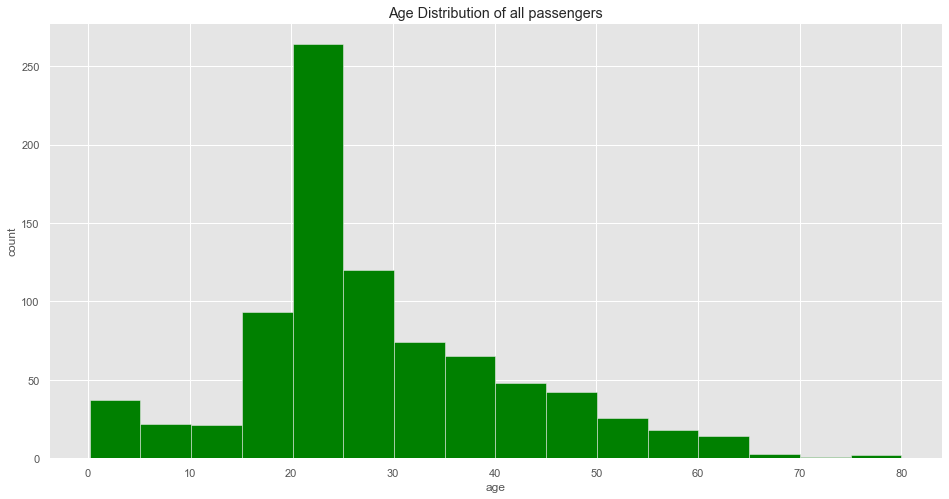

In [153]:
train_data['age_filled_na'].hist(bins=16, color='green' ,figsize=(16,8))
plt.title('Age Distribution of all passengers')
plt.xlabel('age')
plt.ylabel('count')
plt.grid(True)

# EXPLORATORY DATA ANALYSIS

# Analysing Patterns using Visualisation

In [154]:
train_data.describe(include='all')

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,survived,age_filled_na
count,850.000000,850.00000,850,850,676.000000,850.000000,850.000000,850,849.000000,850,308,73.000000,464,850.000000,850.000000
unique,NaN,NaN,849,2,NaN,NaN,NaN,660,NaN,3,26,NaN,272,NaN,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,S,4,NaN,"New York, NY",NaN,NaN
freq,NaN,NaN,2,551,NaN,NaN,NaN,10,NaN,590,25,NaN,36,NaN,NaN
mean,662.816471,2.32000,NaN,NaN,29.519847,0.522353,0.382353,NaN,34.012701,NaN,NaN,165.821918,NaN,0.368235,28.862255
std,380.751936,0.83853,NaN,NaN,14.562243,1.112132,0.879511,NaN,53.705779,NaN,NaN,99.068487,NaN,0.482610,13.281543
min,1.000000,1.00000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,4.000000,NaN,0.000000,0.166700
25%,332.250000,2.00000,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,75.000000,NaN,0.000000,22.000000
50%,676.500000,3.00000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.108300,NaN,NaN,166.000000,NaN,0.000000,25.000000
75%,992.250000,3.00000,NaN,NaN,37.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,260.000000,NaN,1.000000,36.000000


In [155]:
# Checking data types
train_data.dtypes

passenger_id       int64
pclass             int64
name              object
sex               object
age              float64
sibsp              int64
parch              int64
ticket            object
fare             float64
embarked          object
boat              object
body             float64
home.dest         object
survived           int64
age_filled_na    float64
dtype: object

In [156]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
train_data['sexno'] = np.where((train_data['sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added
train_data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,survived,age_filled_na,sexno
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,13,NaN,NaN,1,22.0,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,NaN,NaN,Croatia,0,38.0,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,NaN,NaN,NaN,0,30.0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,4,NaN,"Cornwall / Akron, OH",1,54.0,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,NaN,NaN,"Barre, Co Washington, VT",0,40.0,0


# Correlation

In [157]:
# Correlation table including the new column 'SexNo'
train_data.corr()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived,age_filled_na,sexno
passenger_id,1.000000,0.896525,-0.340788,0.098996,-0.000191,-0.480013,-0.027040,-0.305726,-0.380687,-0.142302
pclass,0.896525,1.000000,-0.406071,0.074418,-0.006388,-0.560884,-0.089349,-0.329360,-0.445442,-0.151932
age,-0.340788,-0.406071,1.000000,-0.251310,-0.159216,0.194609,0.168140,-0.042683,1.000000,-0.034381
sibsp,0.098996,0.074418,-0.251310,1.000000,0.389236,0.141797,-0.121234,-0.044980,-0.204539,0.123723
parch,-0.000191,-0.006388,-0.159216,0.389236,1.000000,0.246414,0.131441,0.059172,-0.138938,0.170068
fare,-0.480013,-0.560884,0.194609,0.141797,0.246414,1.000000,-0.084357,0.251249,0.209457,0.183114
body,-0.027040,-0.089349,0.168140,-0.121234,0.131441,-0.084357,1.000000,NaN,0.168140,0.050651
survived,-0.305726,-0.329360,-0.042683,-0.044980,0.059172,0.251249,NaN,1.000000,-0.032106,0.510274
age_filled_na,-0.380687,-0.445442,1.000000,-0.204539,-0.138938,0.209457,0.168140,-0.032106,1.000000,-0.051626
sexno,-0.142302,-0.151932,-0.034381,0.123723,0.170068,0.183114,0.050651,0.510274,-0.051626,1.000000


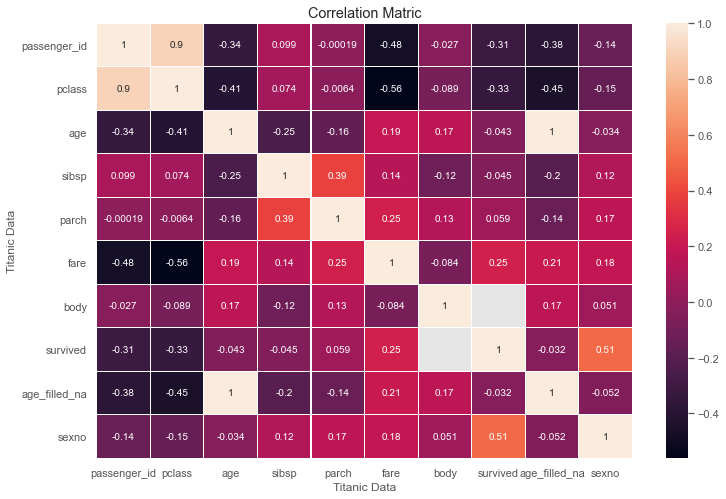

In [158]:
# Visualisation of the corralation table
correlation = train_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matric')
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.show()

# P-value

In [159]:
# Correlation and P-value of 'Survived' and 'Sex'
pearson_coef, p_value = stats.pearsonr(train_data['survived'], train_data['sexno'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.510274046298185  with a P-value of P = 1.5421842054049356e-57


In [160]:
pearson_coef, p_value = stats.pearsonr(train_data['sibsp'], train_data['pclass'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.07441832692992015  with a P-value of P = 0.030047441678059877


In [161]:
# Correlation and P-value of 'Survived' and 'Pclass'
pearson_coef, p_value = stats.pearsonr(train_data['survived'], train_data['pclass'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.32935971195343133  with a P-value of P = 5.913898578748937e-23


# CONTINOUS NUMERICAL VARIABLES

# Linear Relationship

In [162]:
train_data[["age_filled_na","fare"]].corr()

,age_filled_na,fare
age_filled_na,1.000000,0.209457
fare,0.209457,1.000000


(0.1, 83.991665)

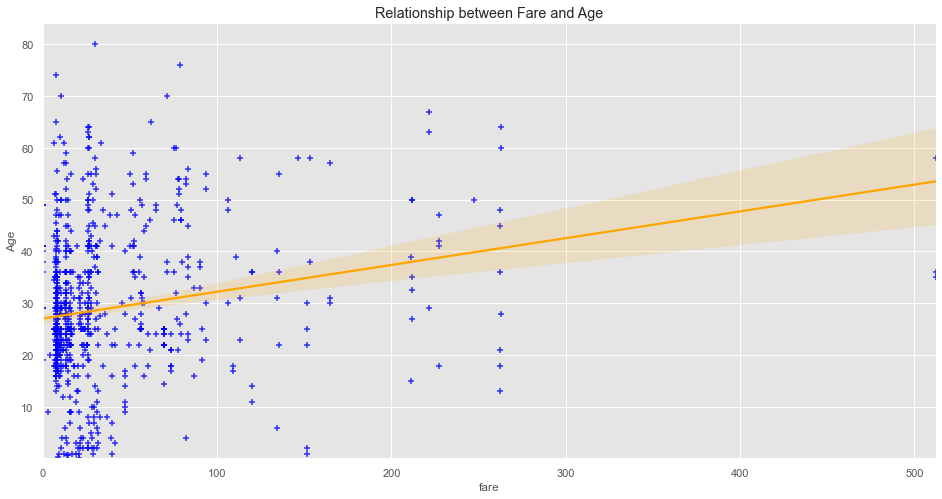

In [163]:
plt.figure(figsize=(16,8))
sns.regplot(x="fare", y="age_filled_na", data=train_data, scatter_kws={'color':'blue'}, line_kws={'color':'orange'}, marker='+')
plt.title('Relationship between Fare and Age')
plt.ylabel('Age')
plt.ylim(0.1,)

Text(0.5, 1.0, 'Relationship between Fare, Age and Sex')

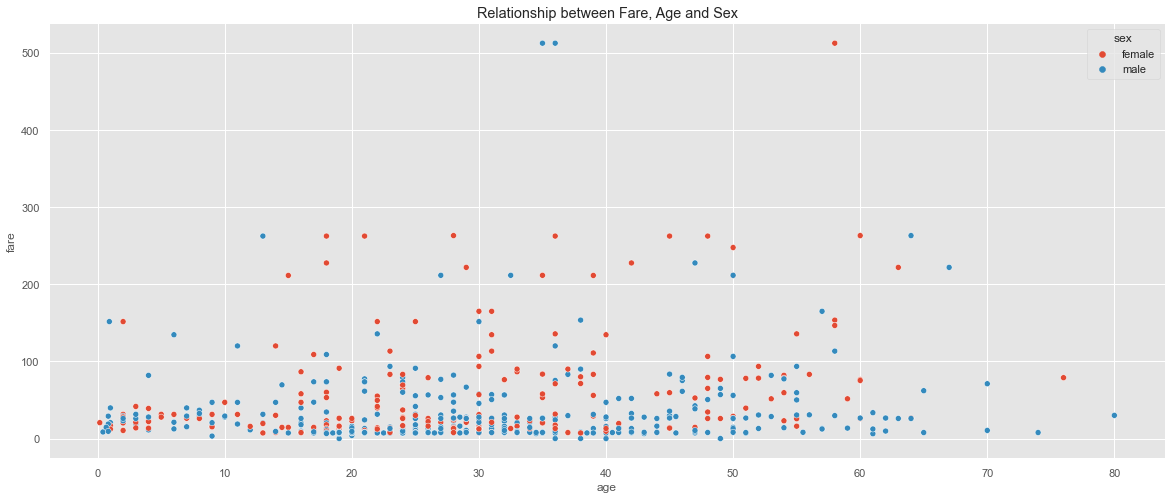

In [164]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='age', y='fare', hue='sex', data = train_data)
plt.title('Relationship between Fare, Age and Sex')

# CATEGORICAL VARIABLES

# GENDER

Text(0.5, 1.0, 'Sex Proportion')

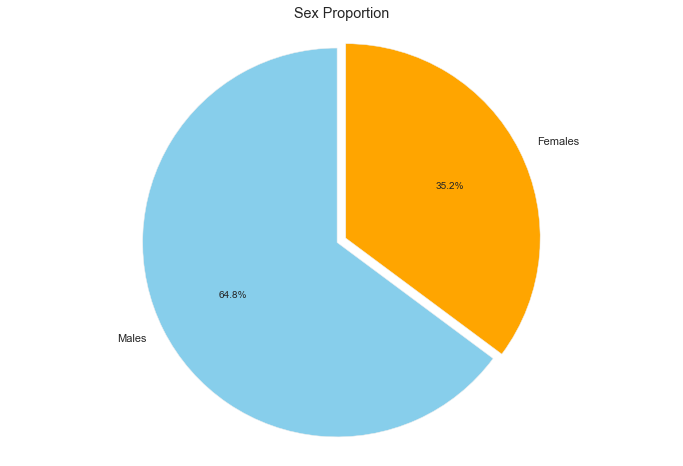

In [165]:
male = (train_data['sex'] == 'male').sum()
female = (train_data['sex']== 'female').sum()
proportions = [male,female]

plt.figure(figsize=(12,8))
plt.pie(proportions, data=train_data, labels= ['Males', 'Females'], colors=['skyblue', 'orange'], explode = (0.05,0), startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Sex Proportion")

# SURVIVED

In [166]:
# No. of people who survived ('Survived' == 0)
survived_data=train_data.survived.value_counts().to_frame()
survived_data

,survived
0,537
1,313


In [167]:
pd.pivot_table(train_data, index="survived", values=['pclass','age_filled_na','sibsp', 'parch', 'fare'])

,age_filled_na,fare,parch,pclass,sibsp
survived,,,,,
0,29.187616,23.707454,0.342644,2.530726,0.560521
1,28.304047,51.660025,0.450479,1.958466,0.456869


# SURVIVED AND AGE

In [168]:
# Amount and average age of people who survived compared to those who died
train_data.groupby(['survived']).age.agg([len,min, max,'mean'])

,len,min,max,mean
survived,,,,
0,537.0,0.7500,74.0,30.020122
1,313.0,0.1667,80.0,28.748747


In [169]:
pearson_coef, p_value = stats.pearsonr(train_data['survived'], train_data['age_filled_na'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.03210614308840187  with a P-value of P = 0.3498344608979158


Text(0, 0.5, 'Age')

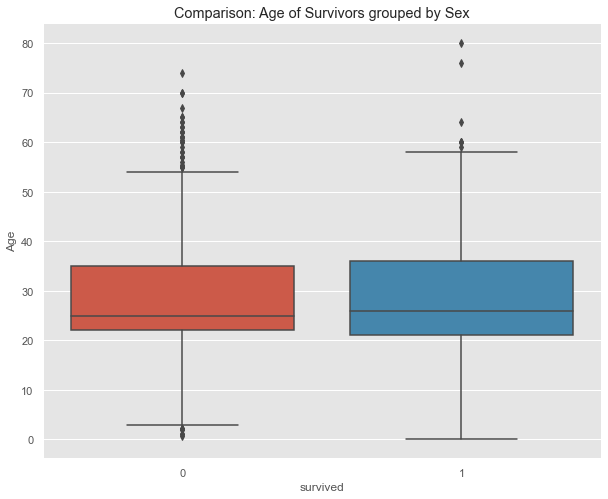

In [170]:
# Age comparision of the people who survived and those who died using a boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x="survived", y="age_filled_na", data=train_data)
plt.title("Comparison: Age of Survivors grouped by Sex")
plt.ylabel('Age')

# SURVIVED AND SEX

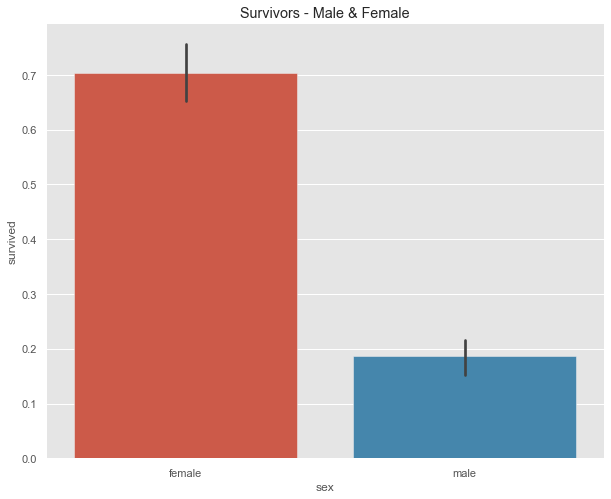

In [171]:
# The barplot compares the survival of men to women
plt.figure(figsize=(10,8))
sns.barplot(x="sex", y="survived", data=train_data)
plt.title("Survivors - Male & Female")
plt.show()

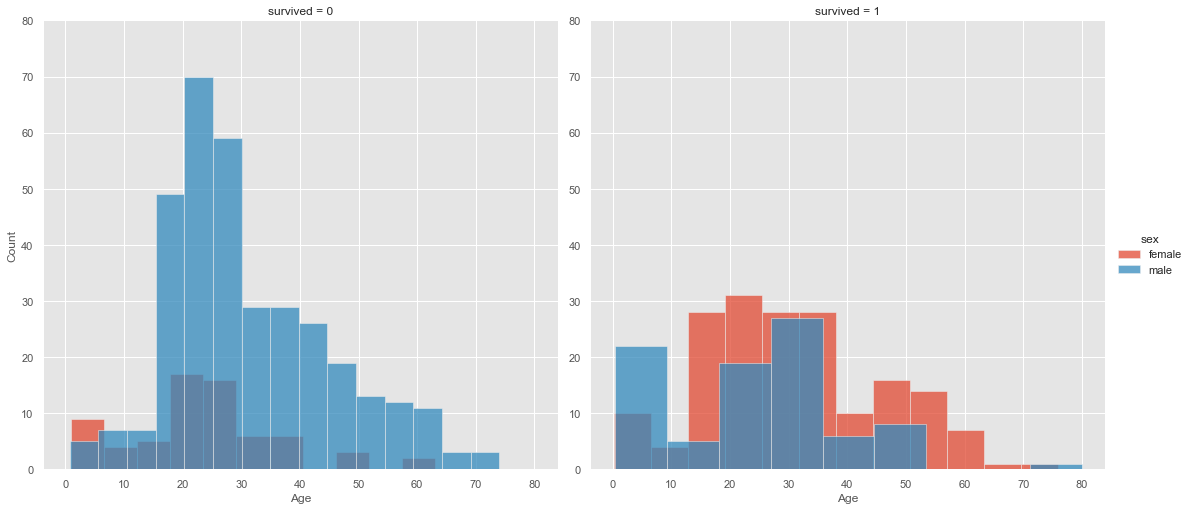

In [172]:
# Sex and Age compared with Survived and Not Survived
g = sns.FacetGrid(train_data, col='survived', sharey=False, ylim=(0,80), hue='sex', height=7, aspect=1.1)
g.map_dataframe(sns.histplot, x='age')
g.set_axis_labels('Age', 'Count')
g.add_legend()

Text(0.5, 1.0, 'Comparison: Survivors - Male & Female')

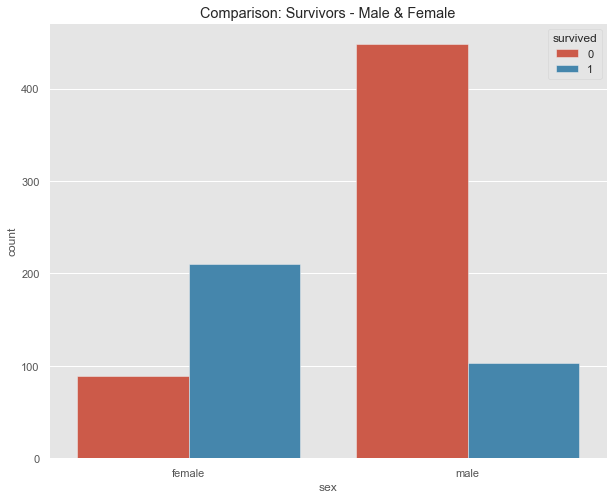

In [173]:
plt.figure(figsize=(10,8))
sns.countplot(x=train_data['sex'],hue=train_data['survived'])
plt.title("Comparison: Survivors - Male & Female")

In [174]:
# Amount and average age of women and men who survived compared to those who died
train_data.groupby(['sex','survived']).age.agg([len,'mean', 'median'])

len       mean  median
sex    survived                          
female 0          89.0  23.272059    22.5
       1         210.0  30.992510    30.0
male   0         448.0  31.361842    28.5
       1         103.0  24.210227    25.5

In [175]:
# Percentage of survived women
women = train_data.loc[train_data.sex == 'female']["survived"]
rate_women = sum(women)/len(women)*100

print("% of women who survived: {:.2f}".format(rate_women))

% of women who survived: 70.23


In [176]:
# Percentage of survived men
men = train_data.loc[train_data.sex == 'male']["survived"]
rate_men = sum(men)/len(men)*100

print("% of men who survived: {:.2f}".format(rate_men))

% of men who survived: 18.69


In [177]:
train_data['pclass'].value_counts()

3    478
1    206
2    166
Name: pclass, dtype: int64

In [178]:
train_data.groupby(['pclass', 'survived']).age.agg([len])

len
pclass survived       
1      0          81.0
       1         125.0
2      0          90.0
       1          76.0
3      0         366.0
       1         112.0

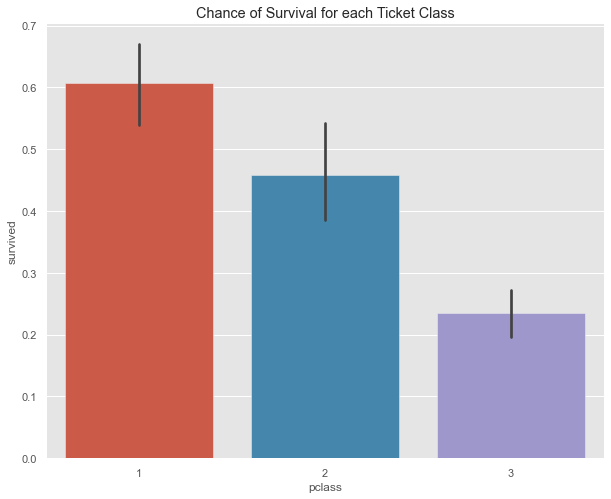

In [179]:
# Compares the chance of survival for each ticket class
plt.figure(figsize=(10,8))
sns.barplot(x="pclass", y="survived", data=train_data)
plt.title("Chance of Survival for each Ticket Class")
plt.show()

Text(0.5, 1.0, 'Comparison: Survivors - Ticket Class')

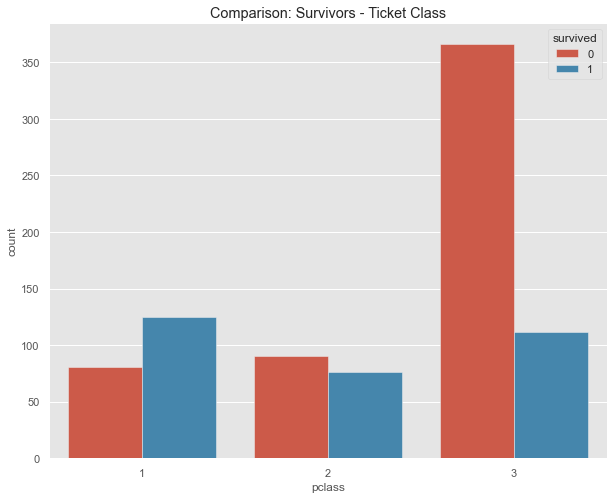

In [180]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8))
sns.countplot(x=train_data['pclass'],hue=train_data['survived'])
plt.title("Comparison: Survivors - Ticket Class")

# SURVIVED, PCLASS, SEX AND AGE

In [181]:
# Amount and average age of women and men of each class who survived compared to those who died
train_data.groupby(['sex','survived', 'pclass']).age.agg([len,min, max,'mean'])

len      min   max       mean
sex    survived pclass                                 
female 0        1         5.0   2.0000  63.0  35.200000
                2         7.0  18.0000  60.0  30.833333
                3        77.0   1.0000  48.0  21.429825
       1        1        89.0  14.0000  76.0  38.309524
                2        60.0   2.0000  55.0  26.577586
                3        61.0   0.1667  45.0  21.032408
male   0        1        76.0  17.0000  70.0  43.427419
                2        83.0  16.0000  70.0  32.935065
                3       289.0   0.7500  74.0  27.080049
       1        1        36.0   0.9167  80.0  33.633839
                2        16.0   0.6667  34.0  13.288887
                3        51.0   0.4167  44.0  20.531250

# SURVIVED AND PARCHED

In [182]:
train_data['parch'].value_counts()

0    651
1    113
2     72
4      5
5      3
3      3
9      2
6      1
Name: parch, dtype: int64

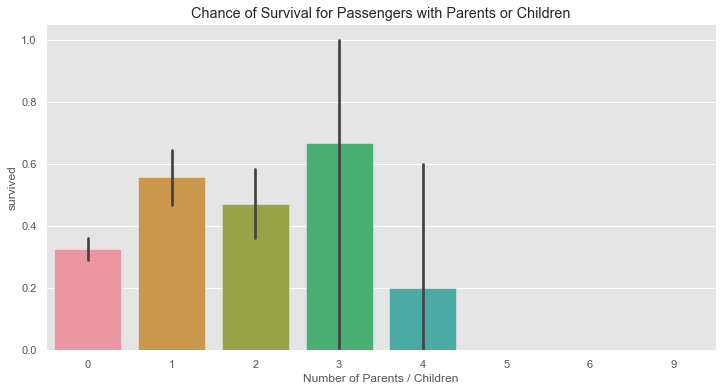

In [183]:
plt.figure(figsize=(12,6))
sns.barplot(x="parch", y="survived", data=train_data)
plt.title("Chance of Survival for Passengers with Parents or Children")
plt.xlabel('Number of Parents / Children')
plt.show()

Text(0.5, 0, 'Parents / Children')

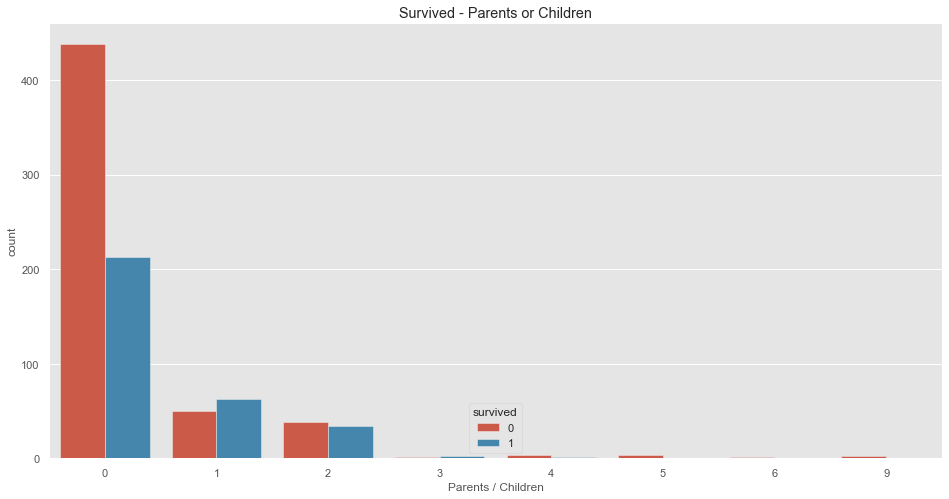

In [184]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_data['parch'],hue=train_data['survived'])
plt.title("Survived - Parents or Children")
plt.xlabel('Parents / Children')

In [185]:
# Age of people with parents or children
train_data.groupby(['parch','survived']).age.agg([len, min, max, 'mean', 'median'])

len      min   max       mean  median
parch survived                                         
0     0         438.0  11.0000  74.0  31.384848    28.0
      1         213.0  12.0000  80.0  32.114706    30.0
1     0          50.0   0.7500  70.0  24.646739    22.0
      1          63.0   0.4167  64.0  24.645833    22.0
2     0          38.0   2.0000  58.0  18.442308    13.5
      1          34.0   0.1667  48.0  16.573233    14.0
3     0           1.0  48.0000  48.0  48.000000    48.0
      1           2.0  48.0000  54.0  51.000000    51.0
4     0           4.0  29.0000  64.0  44.333333    40.0
      1           1.0  60.0000  60.0  60.000000    60.0
5     0           3.0  39.0000  39.0  39.000000    39.0
6     0           1.0  40.0000  40.0  40.000000    40.0
9     0           2.0      NaN   NaN        NaN     NaN

# SURVIVED AND SIBSP

In [186]:
train_data.sibsp.value_counts()

0    573
1    213
2     25
4     14
3     12
8      8
5      5
Name: sibsp, dtype: int64

In [187]:
train_data.groupby(['sibsp','survived']).age.agg([len, 'mean'])

len       mean
sibsp survived                  
0     0         382.0  31.462500
      1         191.0  29.471320
1     0         106.0  32.293011
      1         107.0  28.005893
2     0          14.0  22.583333
      1          11.0  29.666667
3     0          10.0   8.285714
      1           2.0  30.500000
4     0          12.0   7.666667
      1           2.0   4.000000
5     0           5.0  12.000000
8     0           8.0  14.500000

# SURVIVED AND EMBARKED

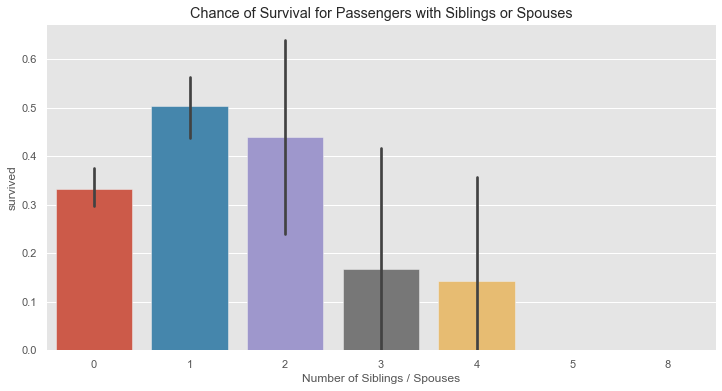

In [188]:
plt.figure(figsize=(12,6))
sns.barplot(x="sibsp", y="survived", data=train_data)
plt.title("Chance of Survival for Passengers with Siblings or Spouses")
plt.xlabel('Number of Siblings / Spouses')
plt.show()

In [189]:
train_data.groupby(['sibsp','survived']).age.agg([len, min, max, 'mean'])

len      min   max       mean
sibsp survived                                 
0     0         382.0   2.0000  74.0  31.462500
      1         191.0   0.4167  80.0  29.471320
1     0         106.0   0.7500  70.0  32.293011
      1         107.0   0.1667  76.0  28.005893
2     0          14.0  16.0000  41.0  22.583333
      1          11.0   4.0000  59.0  29.666667
3     0          10.0   2.0000  31.0   8.285714
      1           2.0  28.0000  33.0  30.500000
4     0          12.0   1.0000  16.0   7.666667
      1           2.0   3.0000   5.0   4.000000
5     0           5.0   9.0000  16.0  12.000000
8     0           8.0  14.5000  14.5  14.500000

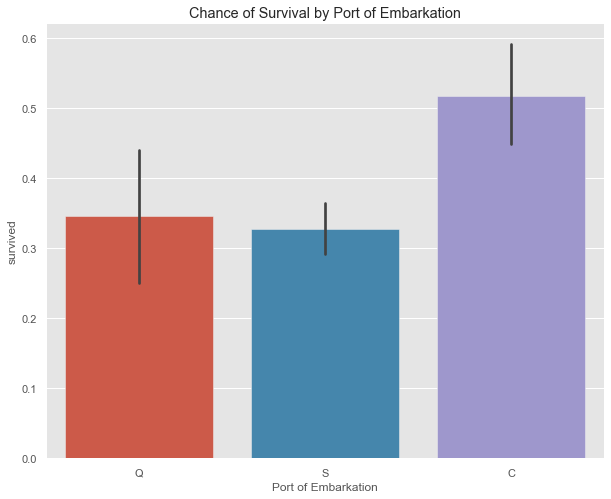

In [190]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(10,8))
sns.barplot(x="embarked", y="survived", data=train_data)
plt.title('Chance of Survival by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.show()

Text(0.5, 0, 'Port of Embarkation')

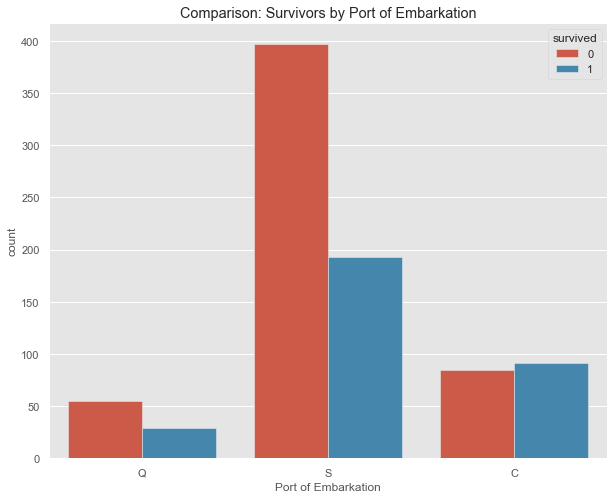

In [191]:
plt.figure(figsize=(10,8))
sns.countplot(x=train_data['embarked'],hue=train_data['survived'])
plt.title("Comparison: Survivors by Port of Embarkation")
plt.xlabel('Port of Embarkation')

# SURVIVED PIVOT

In [192]:
pd.pivot_table(train_data, index= "survived", values=['age', 'sibsp', 'parch', 'fare'])

,age,fare,parch,sibsp
survived,,,,
0,30.020122,23.707454,0.342644,0.560521
1,28.748747,51.660025,0.450479,0.456869


# AGE 

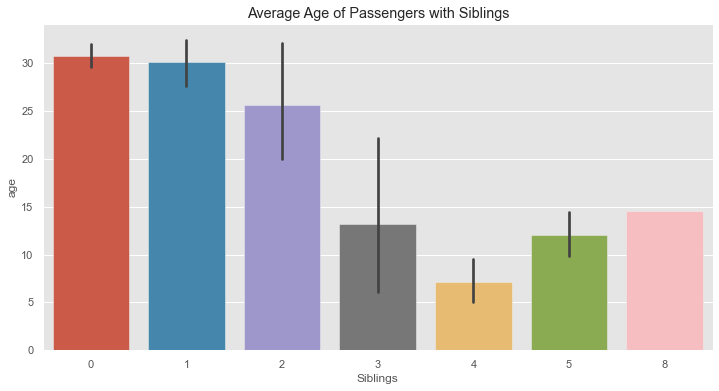

In [193]:
plt.figure(figsize=(12,6))
sns.barplot(x="sibsp", y="age", data=train_data)
plt.title('Average Age of Passengers with Siblings')
plt.xlabel('Siblings')
plt.show()

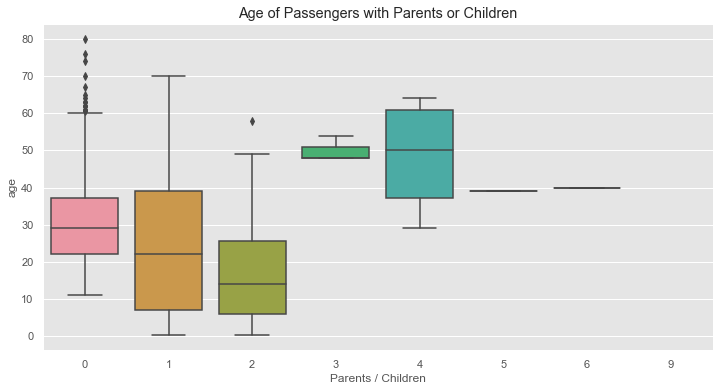

In [194]:
plt.figure(figsize=(12,6))
sns.boxplot(x="parch", y="age", data=train_data)
plt.title('Age of Passengers with Parents or Children')
plt.xlabel('Parents / Children')
plt.show()

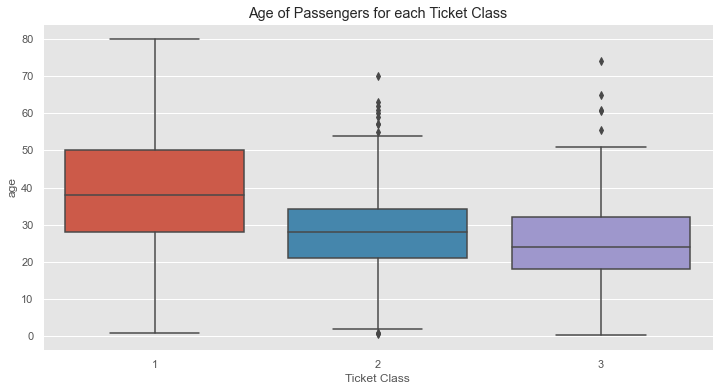

In [195]:
plt.figure(figsize=(12,6))
sns.boxplot(x="pclass", y="age", data=train_data)
plt.title('Age of Passengers for each Ticket Class')
plt.xlabel('Ticket Class')
plt.show()

# FARE

Text(0.5, 1.0, 'Fares Paid')

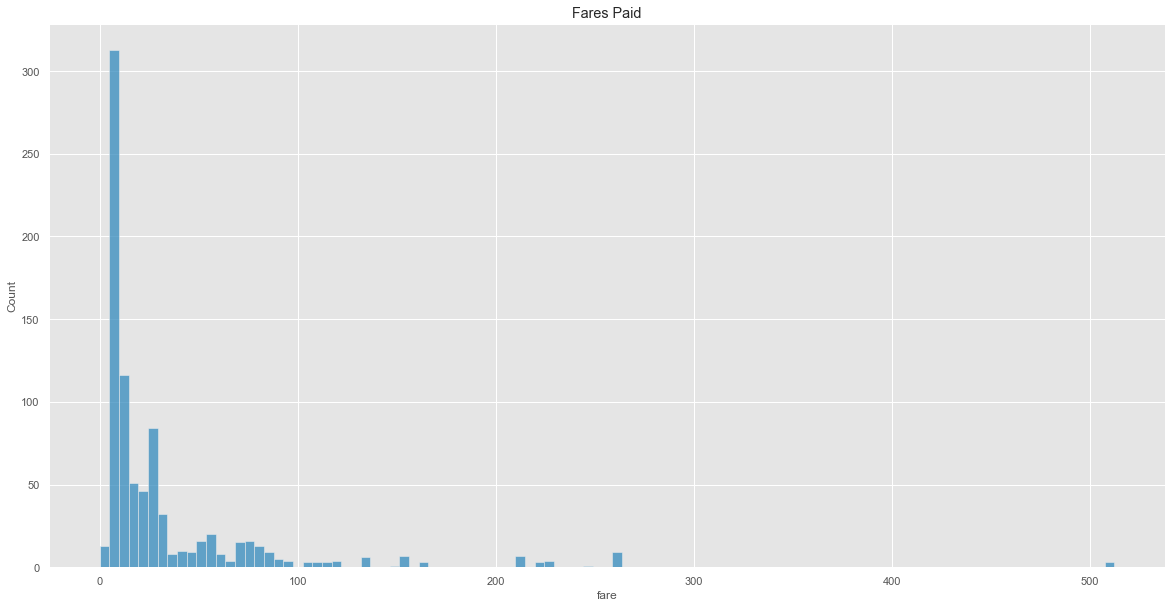

In [196]:
plt.figure(figsize=(20,10))
sns.histplot(train_data.fare)
plt.title('Fares Paid')

# HANDELLING OUTLIERS

In [197]:
train_data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,survived,age_filled_na,sexno
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,13,NaN,NaN,1,22.0,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,NaN,NaN,Croatia,0,38.0,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,NaN,NaN,NaN,0,30.0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,4,NaN,"Cornwall / Akron, OH",1,54.0,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,NaN,NaN,"Barre, Co Washington, VT",0,40.0,0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

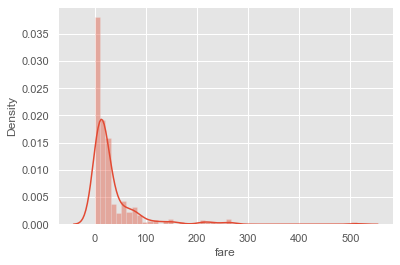

In [198]:
sns.distplot(train_data['fare'])

# COMPAIRING MULTIPLE COLUMNS

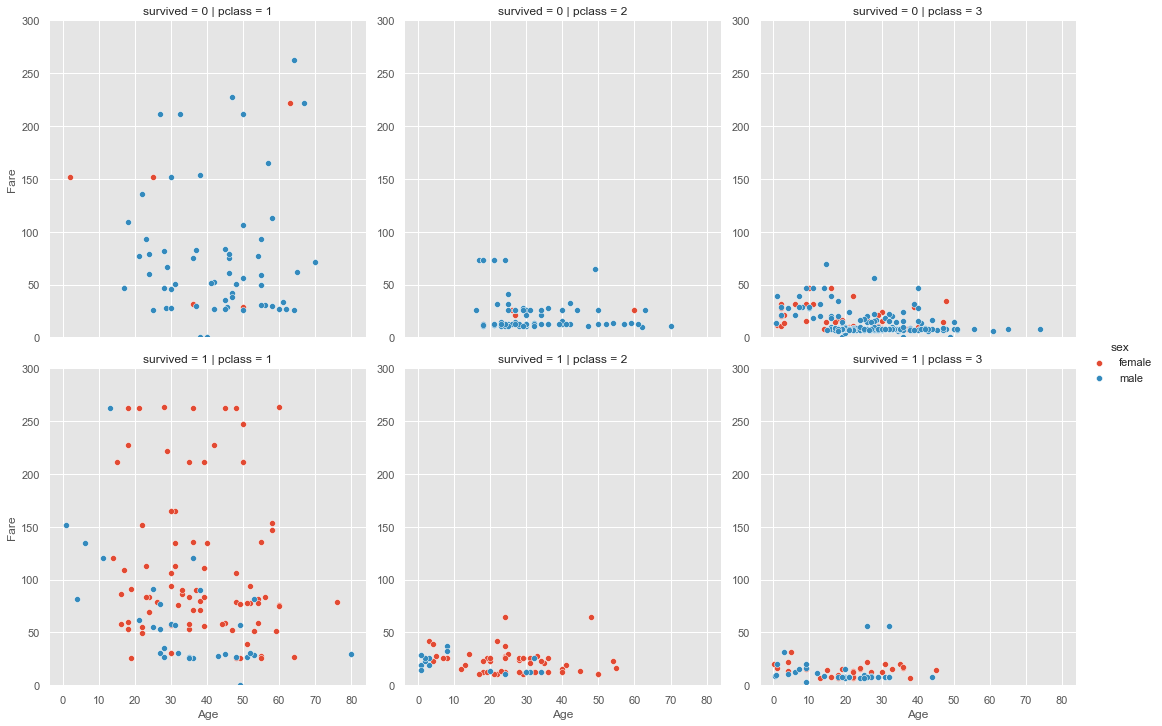

In [199]:
g = sns.FacetGrid(train_data, col='pclass', row='survived', sharey=False, ylim=(0,300), hue='sex', height=5)
g.map_dataframe(sns.scatterplot, x='age', y='fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()

# RANDOM FOREST MODEL-MACHINE LEARNING

In [200]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["survived"]

features = ["pclass", "sex", "sibsp", "parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'passenger_id': test_data.passenger_id, 'survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("The submission is successfull!")

The submission is successfull!
